In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

# Scikit-Learn for Modeling
import sklearn

In [2]:
# Import Elastic Net, Ridge Regression, and Lasso Regression
from sklearn.linear_model import ElasticNet, Ridge, Lasso

# Import Random Forest and Gradient Boosted Trees
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [3]:
# Load cleaned dataset from Module 3
df = pd.read_csv('analytical_base_table.csv')

print(df.shape)

(1882, 37)


In [4]:
# Function for splitting training and test set
from sklearn.model_selection import train_test_split

In [5]:
# Create separate object for target variable
y = df.tx_price
# Create separate object for input features
X = df.drop('tx_price', axis=1)

In [6]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [7]:
print( len(X_train), len(X_test), len(y_train), len(y_test) )

1505 377 1505 377


In [8]:
# Summary statistics of X_train
X_train.describe()

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Composition Shingles,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000
mean,3.423,2.582,2317.345,12414.493,0.874,40.508,4.559,5.142,5.373,41.242,3.430,23.587,16.072,38.575,69.007,64.932,467.595,140.826,6.485,2.793,0.367,0.027,0.054,0.068,0.118,0.036,0.264,0.066,0.071,0.635,0.019,0.183,0.060,0.031,0.425,0.575
std,1.064,0.930,1300.074,33937.256,0.332,47.005,4.527,8.534,7.516,53.662,4.672,25.894,17.759,6.520,19.578,17.146,231.362,72.957,1.998,0.507,0.482,0.163,0.227,0.251,0.323,0.186,0.441,0.248,0.257,0.482,0.138,0.387,0.238,0.174,0.495,0.495
min,1.000,1.000,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,22.000,11.000,5.000,88.000,30.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3.000,2.000,1352.000,1575.000,1.000,7.000,1.000,0.000,0.000,7.000,0.000,4.000,5.000,33.000,59.000,53.000,323.000,96.000,5.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,3.000,3.000,1908.000,6050.000,1.000,23.000,3.000,2.000,3.000,22.000,2.000,15.000,10.000,38.000,73.000,66.000,427.000,127.000,7.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000
75%,4.000,3.000,3000.000,11761.000,1.000,58.000,7.000,6.000,7.000,51.000,5.000,35.000,21.000,43.000,84.000,78.000,573.000,171.000,8.000,3.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000
max,5.000,6.000,7594.000,436471.000,1.000,266.000,24.000,53.000,47.000,340.000,35.000,177.000,94.000,69.000,100.000,100.000,4508.000,1374.000,10.000,4.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [9]:
# Standardize X_train
X_train_new = (X_train - X_train.mean()) / X_train.std()

In [10]:
# Summary statistics of X_train_new
X_train_new.describe()

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Composition Shingles,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000
mean,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.278,-1.700,-1.398,-0.366,-2.630,-0.862,-1.007,-0.603,-0.715,-0.769,-0.734,-0.911,-0.905,-2.542,-2.963,-3.495,-1.641,-1.519,-2.745,-3.533,-0.761,-0.167,-0.240,-0.270,-0.366,-0.193,-0.598,-0.265,-0.277,-1.317,-0.140,-0.474,-0.254,-0.179,-0.860,-1.162
25%,-0.398,-0.626,-0.743,-0.319,0.380,-0.713,-0.786,-0.603,-0.715,-0.638,-0.734,-0.756,-0.623,-0.855,-0.511,-0.696,-0.625,-0.614,-0.743,0.409,-0.761,-0.167,-0.240,-0.270,-0.366,-0.193,-0.598,-0.265,-0.277,-1.317,-0.140,-0.474,-0.254,-0.179,-0.860,-1.162
50%,-0.398,0.449,-0.315,-0.188,0.380,-0.372,-0.344,-0.368,-0.316,-0.359,-0.306,-0.332,-0.342,-0.088,0.204,0.062,-0.175,-0.190,0.258,0.409,-0.761,-0.167,-0.240,-0.270,-0.366,-0.193,-0.598,-0.265,-0.277,0.759,-0.140,-0.474,-0.254,-0.179,-0.860,0.860
75%,0.542,0.449,0.525,-0.019,0.380,0.372,0.539,0.101,0.217,0.182,0.336,0.441,0.277,0.679,0.766,0.762,0.456,0.414,0.758,0.409,1.314,-0.167,-0.240,-0.270,-0.366,-0.193,1.670,-0.265,-0.277,0.759,-0.140,-0.474,-0.254,-0.179,1.162,0.860
max,1.482,3.673,4.059,12.495,0.380,4.797,4.294,5.608,5.538,5.567,6.757,5.925,4.388,4.667,1.583,2.045,17.464,16.903,1.759,2.379,1.314,5.974,4.164,3.708,2.729,5.182,1.670,3.767,3.613,0.759,7.132,2.109,3.941,5.568,1.162,0.860


In [11]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

In [12]:
# For standardization
from sklearn.preprocessing import StandardScaler

In [13]:
# Create pipelines dictionary
pipeline_dict = { 'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
                 'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
                 'enet' : make_pipeline(StandardScaler(), ElasticNet(random_state=123)) }

In [14]:
# Add a pipeline for 'rf'
pipeline_dict['rf'] = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123))
# Add a pipeline for 'gb'
pipeline_dict['gb'] = make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))

In [15]:
# Check that we have all 5 algorithms, and that they are all pipelines
for key, value in pipeline_dict.items():
    print( key, type(value) )

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


In [16]:
# List tuneable hyperparameters of our Lasso pipeline
pipeline_dict['lasso'].get_params()

{'memory': None,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False))],
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'lasso': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=123,
    selection='cyclic', tol=0.0001, warm_start=False),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': 123,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False}

In [17]:
# Lasso hyperparameters
lasso_hyperparameters = { 'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] }

# Ridge hyperparameters 
ridge_hyperparameters = { 'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] }

In [18]:
# Elastic Net hyperparameters
enet_hyperparameters = { 'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 
                       'elasticnet__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

In [19]:
# Random forest hyperparameters
rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
}

In [20]:
# Boosted tree hyperparameters
gb_hyperparameters = { 'gradientboostingregressor__n_estimators': [100, 200],
                     'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
                     'gradientboostingregressor__max_depth': [1, 3, 5]}

In [21]:
# Create hyperparameters dictionary
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters
}

In [22]:
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


In [23]:
# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

In [24]:
# Create cross-validation object from Lasso pipeline and Lasso hyperparameters
model = GridSearchCV(pipeline_dict['lasso'], hyperparameters['lasso'], cv=10, n_jobs=-1)

In [25]:
# Fit and tune model
model.fit(X_train, y_train)

C:\Users\Edidiong Wilson\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=123,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [26]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipeline_dict.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

C:\Users\Edidiong Wilson\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [27]:
# Check that we have 5 cross-validation objects
for key, value in fitted_models.items():
    print( key, type(value) )

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>


In [28]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [29]:
# Display best_score_ for each fitted model
for name, model in fitted_models.items():
    print(name, model.best_score_)

lasso 0.3172075200282584
ridge 0.3221810085402906
enet 0.33839746644773167
rf 0.45572850526879805
gb 0.47453378780906585


In [30]:
# Import r2_score and mean_absolute_error functions
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error

In [31]:
# Display fitted random forest object
fitted_models['rf']

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decr...timators=10, n_jobs=1,
           oob_score=False, random_state=123, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'randomforestregressor__n_estimators': [100, 200], 'randomforestregressor__max_features': ['auto', 'sqrt', 0.33]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
# Predict test set using fitted random forest
pred = fitted_models['rf'].predict(X_test)

In [33]:
# Calculate and print R^2 and MAE
print('R^2: ', r2_score(y_test, pred))
print('MAE: ', mean_absolute_error(y_test, pred))

R^2:  0.46236097769254547
MAE:  79599.28854111406


In [34]:
# Code here
for name, model in fitted_models.items(): 
    pred_var = model.predict(X_test)
    print(name)
    print('-------')
    print('R^2: ', r2_score(y_test, pred_var))
    print('MAE: ', mean_absolute_error(y_test, pred_var))
    

lasso
-------
R^2:  0.3184136450162349
MAE:  93345.59456106214
ridge
-------
R^2:  0.31949555875529545
MAE:  93273.77113977699
enet
-------
R^2:  0.3268230523634337
MAE:  94186.9415534068
rf
-------
R^2:  0.46236097769254547
MAE:  79599.28854111406
gb
-------
R^2:  0.43289910050846125
MAE:  82212.91094483633


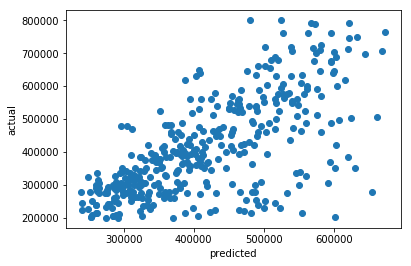

In [35]:
gb_pred = fitted_models['rf'].predict(X_test)
plt.scatter(gb_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [36]:
type(fitted_models['rf'])

sklearn.model_selection._search.GridSearchCV

In [37]:
type(fitted_models['rf'].best_estimator_)

sklearn.pipeline.Pipeline

In [38]:
fitted_models['rf'].best_estimator_

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.33, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=123, verbose=0, warm_start=False))])

In [39]:
import pickle

In [40]:
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)